In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"used_cars_data.csv")

In [3]:
df.describe()

,Year,Kilometers_Driven,Seats,New_Price,Price,mileage_num,engine_num,power_num
count,7252.000000,7251.000000,7199.000000,7252.000000,6019.000000,7169.000000,7206.000000,7077.000000
mean,2013.365830,57811.654255,5.280456,21.308387,9.479468,18.346715,1616.590064,112.764474
std,3.254405,37502.061260,0.809327,24.257816,11.187917,4.158170,595.324779,53.497297
min,1996.000000,171.000000,2.000000,3.910000,0.440000,6.400000,72.000000,34.200000
25%,2011.000000,34000.000000,5.000000,7.880000,3.500000,15.300000,1198.000000,75.000000
50%,2014.000000,53416.000000,5.000000,11.300000,5.640000,18.200000,1493.000000,94.000000
75%,2016.000000,73000.000000,5.000000,21.697500,9.950000,21.100000,1968.000000,138.100000
max,2019.000000,775000.000000,10.000000,375.000000,160.000000,33.540000,5998.000000,616.000000


In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
df.isna().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1232
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

In [6]:
# clan up kilometers driven 
df.fillna({"Kilometers_Driven": df["Kilometers_Driven"].median()}, inplace=True)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Hyderabad,2011,89411.0,Diesel,Manual,First,5.0,13.23,NaN,20.54,1598.0,103.60,volkswagen,vento
7248,Mumbai,2015,59000.0,Petrol,Automatic,First,5.0,10.15,NaN,17.21,1197.0,103.60,volkswagen,polo
7249,Kolkata,2012,28000.0,Diesel,Manual,First,5.0,9.47,NaN,23.08,1461.0,63.10,nissan,micra
7250,Pune,2013,52262.0,Petrol,Automatic,Third,5.0,10.15,NaN,17.20,1197.0,103.60,volkswagen,polo


In [7]:
# Clean up seats.
df["Seats"] = df.groupby(["Year", "Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))
df["Seats"] = df.groupby(["Model"])["Seats"].transform(lambda x: x.fillna(x.median()))
df.fillna({"Seats": df["Seats"].mode()[0]}, inplace=True)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Hyderabad,2011,89411.0,Diesel,Manual,First,5.0,13.23,NaN,20.54,1598.0,103.60,volkswagen,vento
7248,Mumbai,2015,59000.0,Petrol,Automatic,First,5.0,10.15,NaN,17.21,1197.0,103.60,volkswagen,polo
7249,Kolkata,2012,28000.0,Diesel,Manual,First,5.0,9.47,NaN,23.08,1461.0,63.10,nissan,micra
7250,Pune,2013,52262.0,Petrol,Automatic,Third,5.0,10.15,NaN,17.20,1197.0,103.60,volkswagen,polo


In [8]:
# Clean up Engine
df.fillna({"engine_num": df.groupby(['Model', 'Year'])['engine_num'].transform('median')}, inplace=True)
df.fillna({"engine_num": df.groupby(['Model'])['engine_num'].transform('median')}, inplace=True)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Hyderabad,2011,89411.0,Diesel,Manual,First,5.0,13.23,NaN,20.54,1598.0,103.60,volkswagen,vento
7248,Mumbai,2015,59000.0,Petrol,Automatic,First,5.0,10.15,NaN,17.21,1197.0,103.60,volkswagen,polo
7249,Kolkata,2012,28000.0,Diesel,Manual,First,5.0,9.47,NaN,23.08,1461.0,63.10,nissan,micra
7250,Pune,2013,52262.0,Petrol,Automatic,Third,5.0,10.15,NaN,17.20,1197.0,103.60,volkswagen,polo


In [9]:
# Clean up power
df.fillna({"power_num": df.groupby(['Year', 'Model', 'engine_num'])['power_num'].transform('median')}, inplace=True)
df.fillna({"power_num": df.groupby(['Model', 'engine_num'])['power_num'].transform('median')}, inplace=True)
df.fillna({"power_num": df.groupby(['engine_num'])['power_num'].transform('median')}, inplace=True)
df.fillna({"power_num": df["power_num"].median()}, inplace=True)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Hyderabad,2011,89411.0,Diesel,Manual,First,5.0,13.23,NaN,20.54,1598.0,103.60,volkswagen,vento
7248,Mumbai,2015,59000.0,Petrol,Automatic,First,5.0,10.15,NaN,17.21,1197.0,103.60,volkswagen,polo
7249,Kolkata,2012,28000.0,Diesel,Manual,First,5.0,9.47,NaN,23.08,1461.0,63.10,nissan,micra
7250,Pune,2013,52262.0,Petrol,Automatic,Third,5.0,10.15,NaN,17.20,1197.0,103.60,volkswagen,polo


In [10]:
#Cleanup milage
df.fillna({"mileage_num": df.groupby(['Fuel_Type', 'engine_num'])['mileage_num'].transform('median')}, inplace=True)
df.fillna({"mileage_num": df.groupby(['engine_num'])['mileage_num'].transform('median')}, inplace=True)
df.fillna({"mileage_num": df['mileage_num'].median()}, inplace=True)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Hyderabad,2011,89411.0,Diesel,Manual,First,5.0,13.23,NaN,20.54,1598.0,103.60,volkswagen,vento
7248,Mumbai,2015,59000.0,Petrol,Automatic,First,5.0,10.15,NaN,17.21,1197.0,103.60,volkswagen,polo
7249,Kolkata,2012,28000.0,Diesel,Manual,First,5.0,9.47,NaN,23.08,1461.0,63.10,nissan,micra
7250,Pune,2013,52262.0,Petrol,Automatic,Third,5.0,10.15,NaN,17.20,1197.0,103.60,volkswagen,polo


In [11]:
df.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1232
mileage_num             0
engine_num              0
power_num               0
Brand                   0
Model                   0
dtype: int64

In [12]:
df = df[df["Price"].notna()].copy()

In [13]:
df.count()

Location             6018
Year                 6018
Kilometers_Driven    6018
Fuel_Type            6018
Transmission         6018
Owner_Type           6018
Seats                6018
New_Price            6018
Price                6018
mileage_num          6018
engine_num           6018
power_num            6018
Brand                6018
Model                6018
dtype: int64

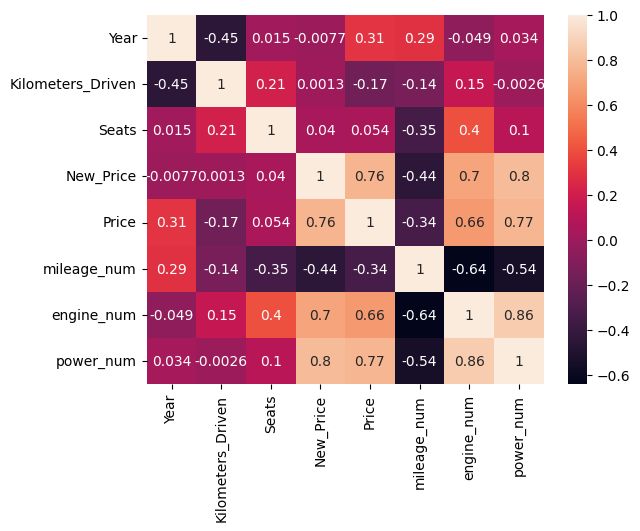

In [14]:
plt.figure()
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
plt.show()

## EDA


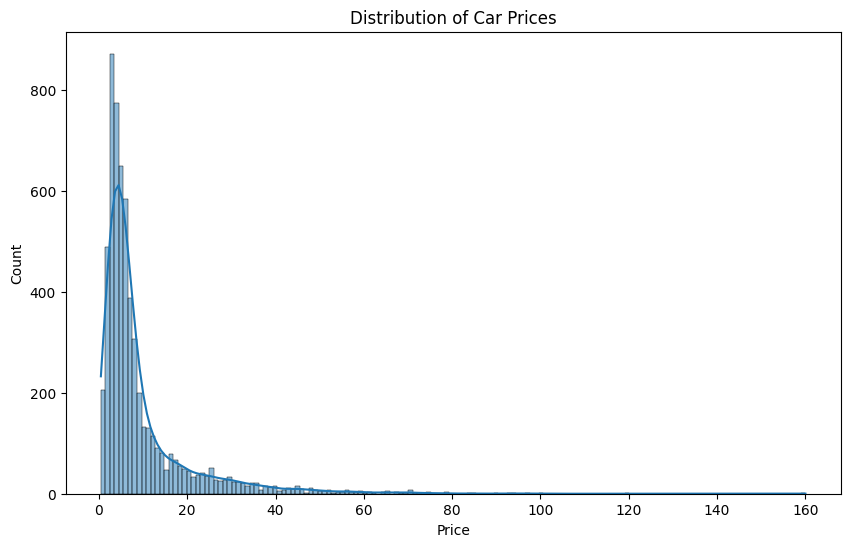

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

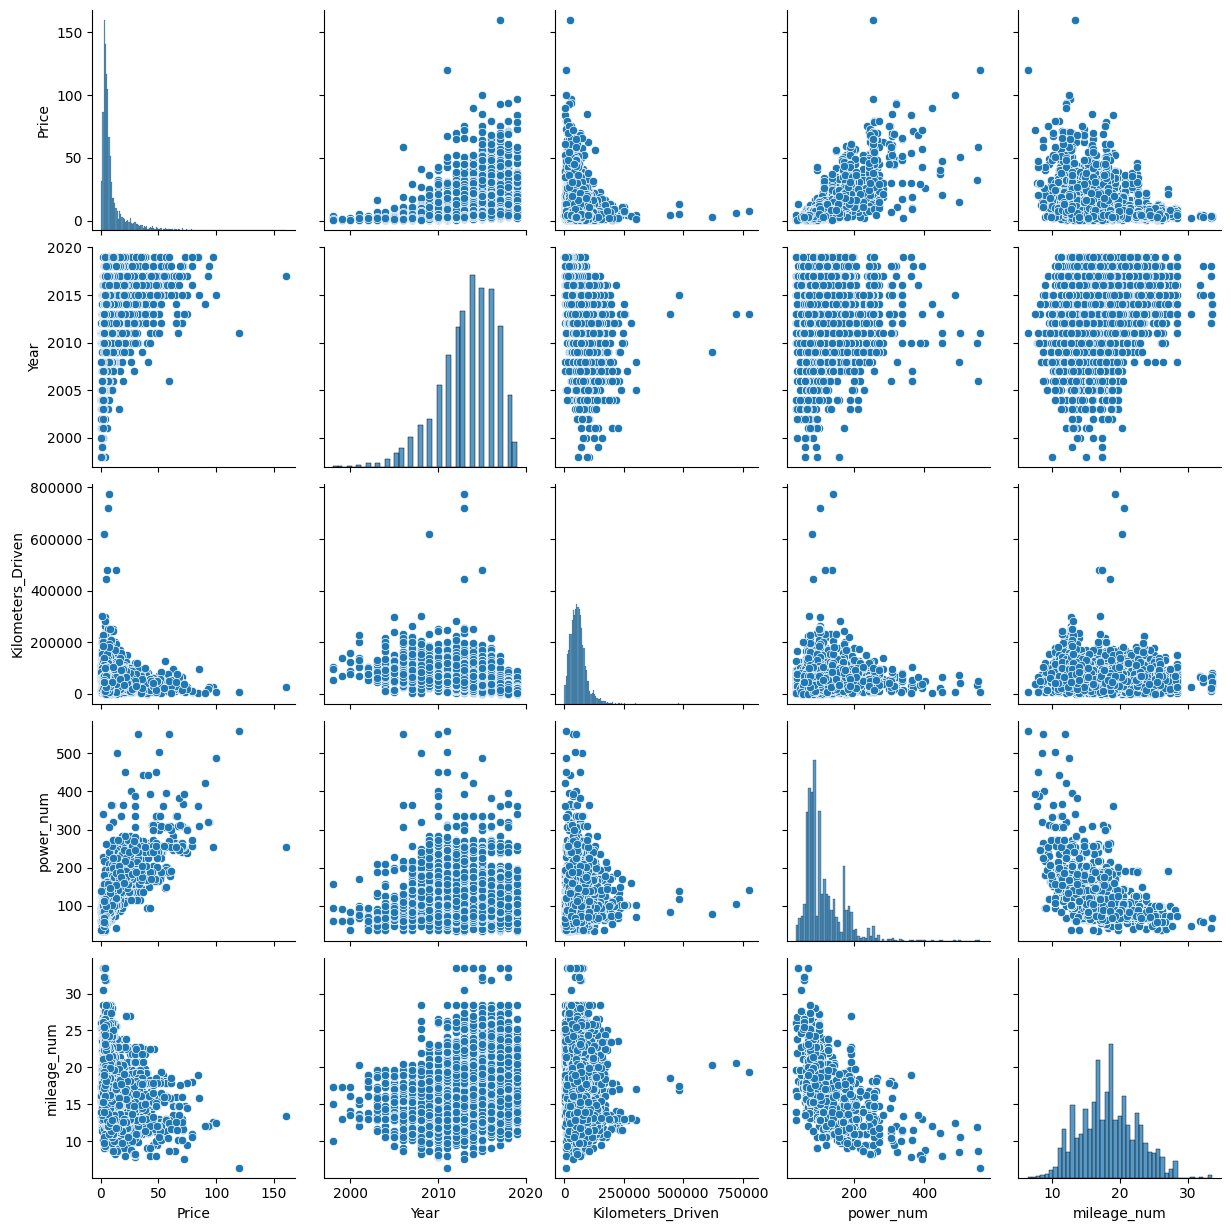

In [16]:
sns.pairplot(df[['Price', 'Year', 'Kilometers_Driven', 'power_num', 'mileage_num']])
plt.show()

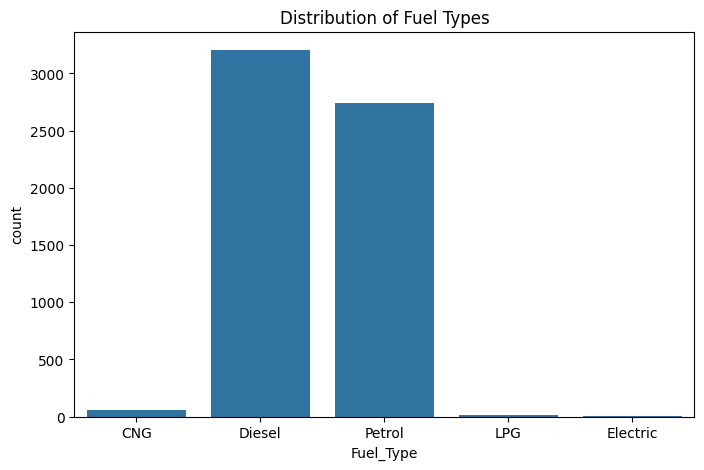

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribution of Fuel Types')
plt.show()

In [18]:
x = df.drop(["Price"], axis=1)
y = df["Price"]

In [19]:
# one hot encoding
x = pd.get_dummies(x, columns=x.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

/tmp/ipykernel_16173/3334955252.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  x = pd.get_dummies(x, columns=x.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)


In [20]:
x = x.astype(float)

In [21]:
x.head()

,Year,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010.0,72000.0,5.0,5.51,26.60,998.0,58.16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015.0,41000.0,5.0,16.06,19.67,1582.0,126.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,46000.0,5.0,8.61,18.20,1199.0,88.70,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,87000.0,7.0,11.27,20.77,1248.0,88.76,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,40670.0,5.0,53.14,15.20,1968.0,140.80,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

def get_data(x, test_size=0.3):
    lin_reg = LinearRegression()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    lin_reg.fit(x_train, y_train)

    y_train_pred = lin_reg.predict(x_train)
    y_test_pred = lin_reg.predict(x_test)

    print(lin_reg.rank_)

    return {
        # "Train size": x_train.shape,
        # "Test size": x_test.shape,
        "Train rmse": root_mean_squared_error(y_train, y_train_pred),
        "Test rmse": root_mean_squared_error(y_test, y_test_pred),
        "Train r2": r2_score(y_train, y_train_pred),
        "Test r2": r2_score(y_test, y_test_pred)
    }


In [23]:
data = get_data(x)

227


In [ ]:
categorical_cols = df.select_dtypes(include=["object", "string", "category"]).columns.tolist()
numerical_cols = df.select_dtypes(exclude=["object", "string", "category"]).columns.tolist()
features_col = ['Brand', 'Model', 'Location', 'Transmission', 'Fuel_Type' ]


## Categorical

In [25]:
x_categorical = pd.get_dummies(df.drop(numerical_cols, axis=1), drop_first=True).astype('float')

x_categorical.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data_a = get_data(x_categorical)

220


## Numerical

In [27]:
x_numerical = df.drop([*categorical_cols, "Price"], axis=1)
x_numerical.head()

,Year,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num
0,2010,72000.0,5.0,5.51,26.60,998.0,58.16
1,2015,41000.0,5.0,16.06,19.67,1582.0,126.20
2,2011,46000.0,5.0,8.61,18.20,1199.0,88.70
3,2012,87000.0,7.0,11.27,20.77,1248.0,88.76
4,2013,40670.0,5.0,53.14,15.20,1968.0,140.80


In [28]:
data_b = get_data(x_numerical)

7


## Features

In [29]:
x_features = pd.get_dummies(df.loc[:, features_col], drop_first=True).astype('float')

x_features.head()

,power_num,mileage_num,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,58.16,26.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,126.20,19.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,88.70,18.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,88.76,20.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,140.80,15.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
data_c = get_data(x_features)

219


In [31]:
table = pd.DataFrame([data, data_a, data_b, data_c], index=['All', 'Categorical', 'Numerical', 'Features'])

In [32]:
print(table)

             Train rmse  Test rmse  Train r2   Test r2
All            3.949932   5.054519  0.875053  0.796903
Categorical    4.988398   5.937927  0.800718  0.719706
Numerical      5.560148   5.871501  0.752418  0.725942
Features       4.832254   5.737632  0.812998  0.738297
